# LSTM: Airline Passengers Data Set
References: https://matthewmacfarquhar.medium.com/predicting-airline-passengers-using-lstm-and-tensorflow-ab86347cf318
https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

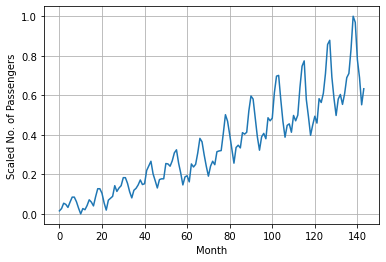

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

df = pd.read_csv('AirPassengers.csv',usecols=[1])
df.head()

scaler = MinMaxScaler()
y = scaler.fit_transform(df)
plt.plot(np.arange(0,len(y)),y)
plt.grid()
plt.ylabel('Scaled No. of Passengers')
plt.xlabel('Month')
plt.show()

Split the data into 70% training and 30% testing.

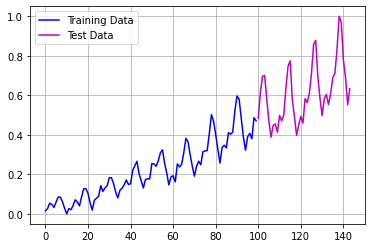

In [2]:
train_size = int(len(df) * 0.7)
y_train, y_test = y[0:train_size], y[train_size:]
plt.plot(np.arange(0,len(y_train)), y_train,'b')
plt.plot(np.arange(len(y_train),len(y)), y_test, 'm')
plt.grid()
plt.legend(('Training Data','Test Data'))
plt.show()

Reshape the data into a suitable form for LSTM

In [3]:
def create_dataset(dataset, look_back=1):
    X,Y = [], []
    for i in range(len(dataset)-look_back-1):
        X.append(dataset[i:(i+look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 5
trainX, trainY = create_dataset(y_train, look_back)
testX, testY = create_dataset(y_test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(94, 1, 5)
(38, 1, 5)
(94,)
(38,)


Setup the LSTM architecture

In [4]:
model = Sequential()
model.add(LSTM(8, input_shape=(1, look_back)))
model.add(Dense(8))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8)                 448       
_________________________________________________________________
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________


Train the model.

Epoch 1/100
94/94 [==============================] - 0s 988us/step - loss: 0.0119
Epoch 2/100
94/94 [==============================] - 0s 961us/step - loss: 0.0063
Epoch 3/100
94/94 [==============================] - 0s 970us/step - loss: 0.0055
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 6/100
94/94 [==============================] - 0s 990us/step - loss: 0.0044
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 10/100
94/94 [==============================] - 0s 927us/step - loss: 0.0038
Epoch 11/100
94/94 [==============================] - 0s 921us/step - loss: 0.0039
Epoch 12/100
94/94 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 13/100
94/94 [=====

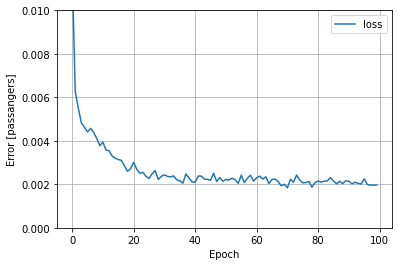

In [5]:
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
history = model.fit(trainX, trainY, epochs=100, batch_size=1)
plt.plot(history.history['loss'], label='loss')
plt.ylim([0, 0.01])
plt.xlabel('Epoch')
plt.ylabel('Error [passangers]')
plt.legend()
plt.grid()

Make predictions on Test Data

In [6]:
# make predictions
trainPredict = model.predict(trainX).reshape(-1,1)
testPredict = model.predict(testX).reshape(-1,1)
trainY, testY = trainY.reshape(-1,1), testY.reshape(-1,1)

# revert to original scale
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
trainY = scaler.inverse_transform(trainY)
testY = scaler.inverse_transform(testY)

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.15 RMSE
Test Score: 53.71 RMSE


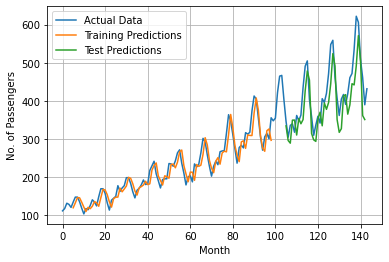

In [7]:
plt.plot(np.arange(0,len(y)),scaler.inverse_transform(y))
plt.plot(np.arange(look_back,len(trainPredict)+look_back),trainPredict)
plt.plot(np.arange(len(trainPredict)+(look_back*2)+1,len(y)-1),testPredict)
plt.legend(('Actual Data','Training Predictions','Test Predictions'))
plt.grid()
plt.ylabel('No. of Passengers')
plt.xlabel('Month')
plt.show()